In [ ]:
# !pip install -q insightface onnxruntime-gpu deepface opencv-python gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.5/300.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.4 MB/s eta 0:00:0

# Đây là file chạy upload ảnh thủ công trên co-lab nếu web hết hạn hoặc không đủ GPU

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from deepface import DeepFace
from insightface.app import FaceAnalysis
from PIL import Image

26-01-16 13:31:56 - Directory /root/.deepface has been created
26-01-16 13:31:56 - Directory /root/.deepface/weights has been created


In [3]:
face_app = FaceAnalysis(allowed_modules=['detection'])
face_app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 76063.43KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


In [4]:
def process_and_plot():
    uploaded = files.upload()
    if not uploaded:
        print("Không có tệp nào được chọn.")
        return

    file_path = list(uploaded.keys())[0]
    img = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = face_app.get(img)
    if not faces:
        print("Không tìm thấy gương mặt nào.")
        return

    largest_face = max(faces, key=lambda f: (f.bbox[2]-f.bbox[0]) * (f.bbox[3]-f.bbox[1]))
    bbox = largest_face.bbox.astype(int)
    x1, y1, x2, y2 = bbox

    padding = 40
    h_img, w_img = img.shape[:2]
    x1, y1 = max(0, x1 - padding), max(0, y1 - padding)
    x2, y2 = min(w_img, x2 + padding), min(h_img, y2 + padding)
    cropped_face = img[y1:y2, x1:x2]

    try:
        results = DeepFace.analyze(img_path = cropped_face,
                                   actions = ['emotion'],
                                   enforce_detection = False)
        emotions = results[0]['emotion']
        dominant = results[0]['dominant_emotion']

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        ax1.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))
        ax1.set_title(f"Detected Face\nDominant: {dominant.upper()}")
        ax1.axis('off')

        emotion_names = list(emotions.keys())
        emotion_values = list(emotions.values())

        indexed_emotions = sorted(zip(emotion_names, emotion_values), key=lambda x: x[1])
        names, values = zip(*indexed_emotions)

        bars = ax2.barh(names, values, color='skyblue')
        ax2.set_xlabel('Tỷ lệ (%)')
        ax2.set_title('Phân tích chi tiết cảm xúc')
        ax2.bar_label(bars, fmt='%.1f%%', padding=3)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Lỗi: {str(e)}")

Saving angry_3.jpg to angry_3.jpg
26-01-16 13:33:04 - 🔗 facial_expression_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 to /root/.deepface/weights/facial_expression_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 75.7MB/s]


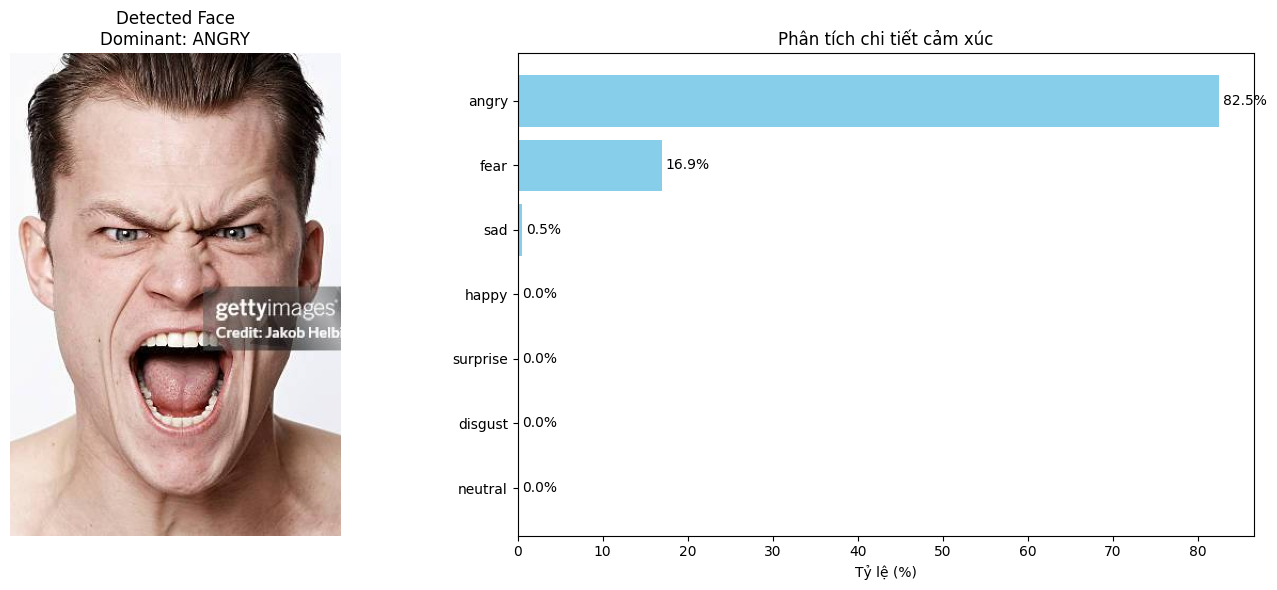

In [5]:
process_and_plot()